In [1]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import expm_multiply as expm
from scipy.sparse.linalg import eigsh 
import matplotlib.pyplot as plt

In [2]:
def speye(a):
    return sparse.eye(a,format="csr")

def skron(a,b):
    return sparse.kron(a,b,format="csr")

In [3]:
pup=sparse.csr_matrix(np.array([[1.,0.],[0.,0.]]))
sx=sparse.csr_matrix(np.array([[0.,1.],[1.,0.]]))

In [4]:
def Hamiltonian(N):
    
    H=sparse.csr_matrix((2**N,2**N))

    for ii in range(N-2):
        H-=skron(speye(2**(N-ii-3)),skron(skron(pup,skron(sx,pup)),speye(2**(ii))))
        
    return H

In [5]:
def evolution_Krylov(N,T,t,psi0,dt=0.005):

    psi=psi0.copy()
    step=int(t/dt)
    ts=int(T/(dt*step))
        
    H=Hamiltonian(N)
    
    time=step*dt*np.arange(ts+1)
    y=np.zeros(ts+1)
    
    #measurement
    tmp = psi0.dot(psi)
    y[0] = np.abs(tmp)**2
    
    for ii in range(ts):
        for _ in range(step):
            psi=expm(-1j*dt*H,psi)
        #measurement
        tmp = psi0.dot(psi)
        y[ii+1] = np.abs(tmp)**2
        
    return time,y

In [6]:
T=20
t=0.05

In [7]:
N=10
psi=np.zeros(2**N)

tmp=0

for ii in range(N):
    tmp+=(ii%2==1)*2**(ii)

psi[tmp]=1.

In [9]:
time,y=evolution_Krylov(N,T,t,psi)

In [10]:
N=10
psi=np.zeros(2**N)

psi[0]=1.

In [12]:
time2,y2=evolution_Krylov(N,T,t,psi)

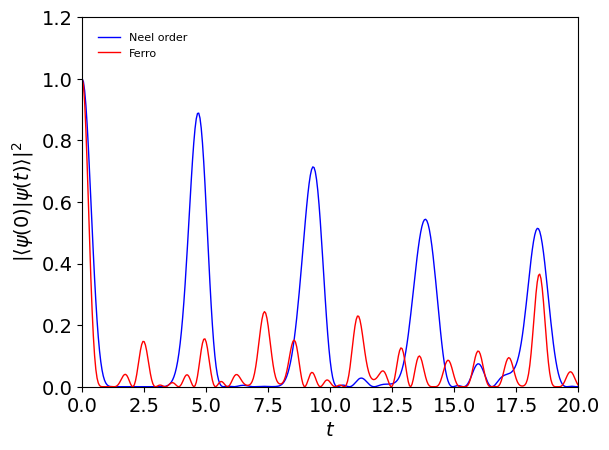

In [13]:
plt.plot(time,y,'b-', linewidth=1,label="Neel order")
plt.plot(time2,y2,'r-', linewidth=1,label="Ferro")

plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$|\langle\psi(0)|\psi(t)\rangle|^2$", fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim([0.,T])
plt.ylim([0.,1.20])
legend =plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left', borderaxespad=1, fontsize=8)
frame = legend.get_frame()
frame.set_linewidth(0)
plt.show()

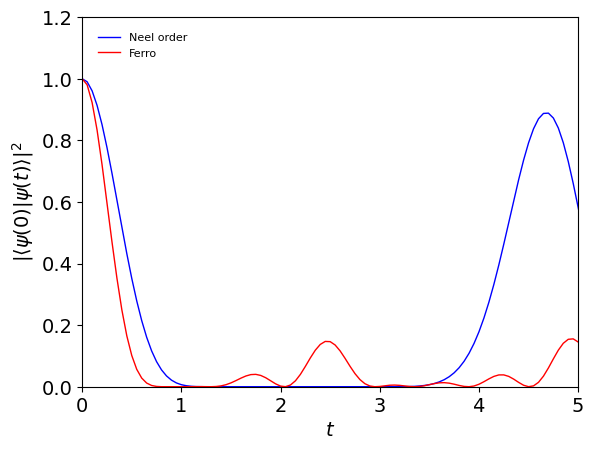

In [14]:
plt.plot(time,y,'b-', linewidth=1,label="Neel order")
plt.plot(time2,y2,'r-', linewidth=1,label="Ferro")

plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$|\langle\psi(0)|\psi(t)\rangle|^2$", fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim([0.,T/4])
plt.ylim([0.,1.20])
legend =plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left', borderaxespad=1, fontsize=8)
frame = legend.get_frame()
frame.set_linewidth(0)
plt.show()

In [16]:
def evolution_Krylov(N,T,t,psi0,dt=0.005):

    psi=psi0.copy()
    step=int(t/dt)
    ts=int(T/(dt*step))
        
    H=Hamiltonian(N)
    
    time=step*dt*np.arange(ts+1)
    y=np.zeros(ts+1)
    
    #measurement
    psitmp=psi.reshape(2**(N//2),2**(N//2))
    rho = psitmp.dot(psitmp.T.conj())
    y[0] = -np.log( ( rho.dot(rho) ).diagonal().sum().real )
    
    for ii in range(ts):
        for _ in range(step):
            psi=expm(-1j*dt*H,psi)
        #measurement
        psitmp=psi.reshape(2**(N//2),2**(N//2))
        rho = psitmp.dot(psitmp.T.conj())
        y[ii+1] = -np.log(  (rho.dot(rho) ).diagonal().sum().real )
        
    return time,y

In [17]:
T=20
t=0.05

In [18]:
N=10
psi=np.zeros(2**N)

tmp=0

for ii in range(N):
    tmp+=(ii%2==1)*2**(ii)

psi[tmp]=1.

In [20]:
time,y=evolution_Krylov(N,T,t,psi)

In [21]:
N=10
psi=np.zeros(2**N)

psi[0]=1.

In [23]:
time2,y2=evolution_Krylov(N,T,t,psi)

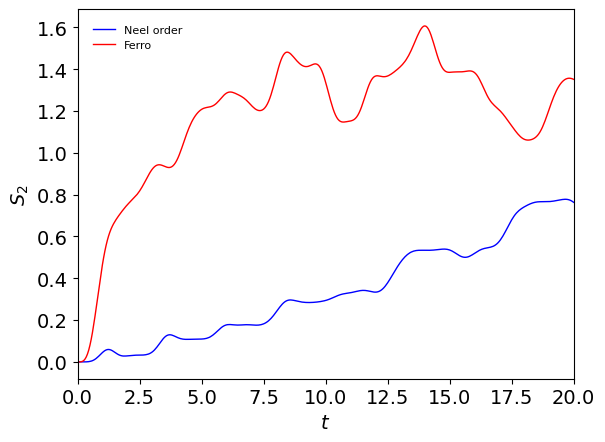

In [24]:
plt.plot(time,y,'b-', linewidth=1,label="Neel order")
plt.plot(time2,y2,'r-', linewidth=1,label="Ferro")

plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$S_2$", fontsize=14)
plt.tick_params(labelsize=14)
plt.xlim([0.,T])
#plt.ylim([0.,1.20])
legend =plt.legend(bbox_to_anchor=(0, 1.0), loc='upper left', borderaxespad=1, fontsize=8)
frame = legend.get_frame()
frame.set_linewidth(0)
plt.show()